# pyiron: Graphical User Interface Example 

Niklas Siemer (siemer@mpie.de)

In [1]:
%matplotlib notebook

In [2]:
from pyiron_atomistics import Project
from pyiron_gui import activate_gui

## Feature Project Browser

In [3]:
pr =  Project('projects')

In [4]:
pr = activate_gui(pr)

In [6]:
pr.browser.show_files=True
pr.browser

## Feature Line Profiles

In [7]:
from pyiron_experimental.tem_analysis import LineProfiles

import hyperspy.api as hs

import numpy as np
import matplotlib.pyplot as plt
import os

In [8]:
plt.ion()

In [9]:
tem_pr = pr['TEM']

DEBUG:pyiron_log:sql_query: {'project': 'GUI_ProjectBrowser_Demo/pyiron_gui_example/projects/'}


In [10]:
img_pr.list_all()

DEBUG:pyiron_log:sql_query: {'project': 'GUI_ProjectBrowser_Demo/pyiron_gui_example/projects/Images/'}


{'groups': [],
 'nodes': [],
 'files': ['Astronaut.png',
  'Binary_blobs.tiff',
  'Brick.bmp',
  'Camera.jpg',
  'experiment.emd',
  'Grass.tiff']}

Load the TEM experiment data via hyperspy:

In [11]:
data = hs.load(os.path.join(tem_pr.path, 'experiment.emd'))

In [12]:
data

[<Signal2D, title: HAADF, dimensions: (|256, 256)>,
 <EDSTEMSpectrum, title: EDS, dimensions: (256, 256|4096)>]

Initiate `LineProfiles` with the Signal stream of interest.

In [13]:
lp = LineProfiles(emd_signal=data[0])

Plot the signal - this Figure will be used to select the Line(s) of interest.

<IPython.core.display.Javascript object>


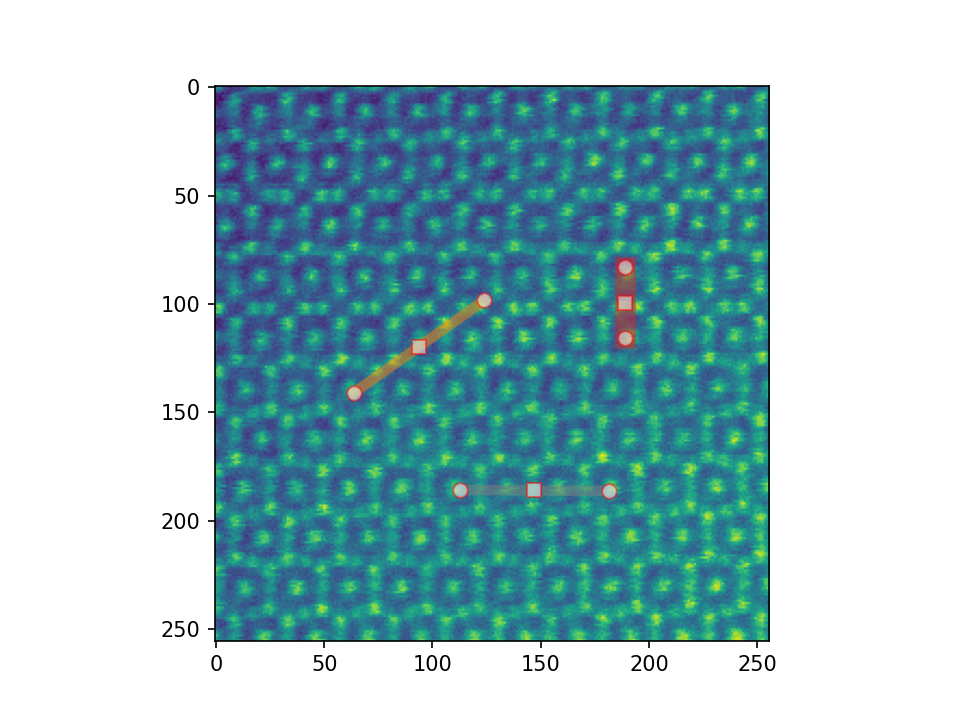

(<Figure size 640x480 with 1 Axes>, <AxesSubplot:>)

In [14]:
lp.plot_signal()

Add a line of which the line profile should be determined: Call the method and click and drag a line on the signal. Afterwards, the lines can be changed by click and drag on the handles, Furthermore, the line may be redrawn by clicking and draging apart from the handles.

In [15]:
lp.add_line()

You may add as many lines as you want and the appearance may be changed as needed:

In [16]:
lp.add_line(line_properties={"color": "gray"})

 The last added line is the only one being responsive. To change a different line use `lp.active_line` and set it to the line of interest (numbered in order of adding)

In [17]:
lp.active_line = 0

The linewidth option `lw` is treated specially, since this is used to average the line profile over the thickness.

In [18]:
lp.add_line(lw=10)

Finally, all lines choosen may be plotted via `plot_line_profiles()` where the line properties of are retained.

<IPython.core.display.Javascript object>


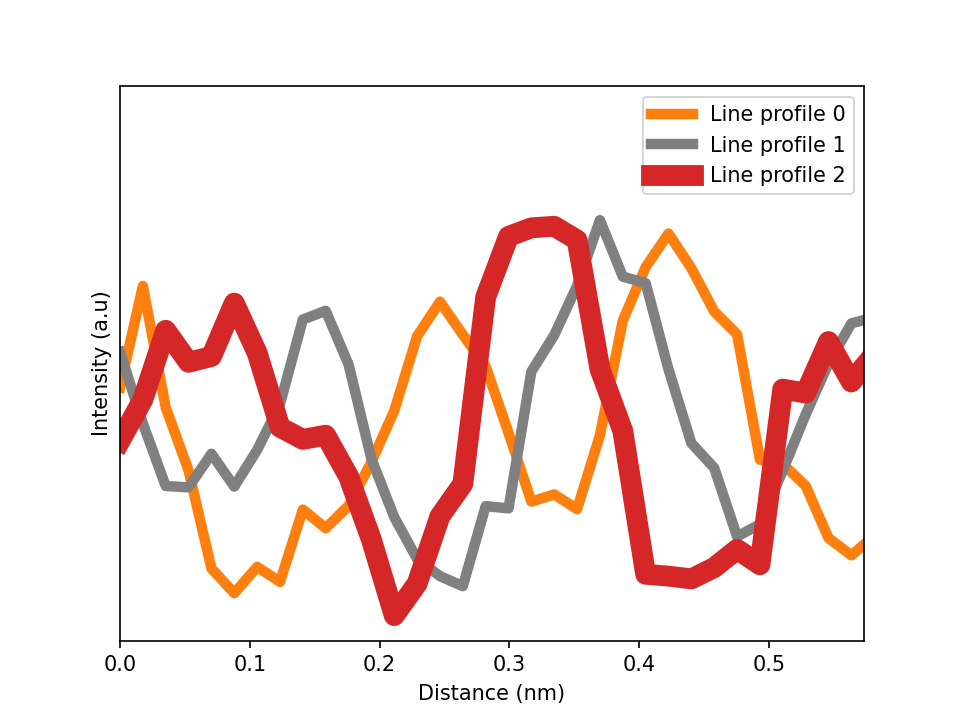

In [19]:
lp.plot_line_profiles()